In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 랜덤 모듈 
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation
# CNN : 커널을 통해 합성곱을 구하는 것. 이미지의 특징이 두드러 지게 한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
# MaxPooling : 커널내에서 가장 큰 값을 추출하는 방식으로 불필요한 부분을 제거한다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D
# Flatten : 다차원의 이미지 데이터를 선형 회귀 은닉층으로 전달하기 전에
# 1차원으로 변환하는 것
from tensorflow.keras.layers import Flatten
# Dropout : 이미지나 영상, 음파 등의 데이터는 오랫동안 학습을 진행 시켜야 한다.
# 하지만 너무 빨리 과적합이 발생되면 조기 중단 때문에 학습 횟수가 줄어들 수 있다.
# 이에 은닉의 노드를 일부 사용하지 않으므로써 과적합이 빨리 오는 것을 예방하고
# 오랫동한 학습이 진행될 수 있도록 한다.
from tensorflow.keras.layers import Dropout
# Embedding : 단어의 수를 조정한다.
from tensorflow.keras.layers import Embedding

# LSTM
from tensorflow.keras.layers import LSTM



# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping

# 문장을 잘라준다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터의 수를 동일한 수로 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 가지고 단어 사전을 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence



# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 -> 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1

np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.
gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

### 데이터 불러오기

In [24]:
# ratings.dat
# 파일들의 데이터를 구분자로 ::를 사용하고있다.
rating_data = pd.read_csv('./data/ratings.dat', delimiter='::', header=None)
rating_data.columns = ['user_id', 'movie_id', 'rating', 'time']
rating_data

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [25]:
# movies.dat
movie_data = pd.read_csv('./data/movies.dat', delimiter='::', header=None, 
                        encoding='latin-1')
movie_data.columns = ['movie_id', 'title', 'genre']
movie_data

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [26]:
# users.dat
user_data = pd.read_csv('./data/users.dat', delimiter='::', header=None)
user_data.columns = ['user_id', 'gender', 'age', 'occupation', 'zipcode']
user_data

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [13]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
 3   time      1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [14]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [15]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [16]:
rating_data.isna().sum()

user_id     0
movie_id    0
rating      0
time        0
dtype: int64

In [17]:
movie_data.isna().sum()

movie_id    0
title       0
genre       0
dtype: int64

In [19]:
user_data.isna().sum()

user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

- 년대별(1910, 1920, 1930 년대...) 영화를 수를 구하고 시각화 하세요.
- 장르별 영화 수를 구하고 시각화 하세요.(한 영화에 장르가 여러개가 있다면 각 장르별로 하나씩 있는 걸로 간주한다.)
- 사용자 성별 수를 그래프로 시각화한다.
- 연령대별(10, 20, 30대...) 사용자 수를 그래프로 시각화 한다.
- 평균 평점이 가장 높은 장르가 무엇인지 확인한다.
- 연령대별(10, 20, 30대...) 평점의 평균을 구해 시각화 한다.
- 직업(occupation) 별 영화 평점의 평균을 구해 시각화 한다.

### 년대별(1910, 1920, 1930 년대...) 영화를 수를 구하고 시각화 하세요.

In [50]:
a1 = movie_data['title'].str.split('(')
a1

0                         [Toy Story , 1995)]
1                           [Jumanji , 1995)]
2                  [Grumpier Old Men , 1995)]
3                 [Waiting to Exhale , 1995)]
4       [Father of the Bride Part II , 1995)]
                        ...                  
3878               [Meet the Parents , 2000)]
3879            [Requiem for a Dream , 2000)]
3880                      [Tigerland , 2000)]
3881               [Two Family House , 2000)]
3882                 [Contender, The , 2000)]
Name: title, Length: 3883, dtype: object

In [55]:
a2 = movie_data['title'].str[:-7]
a2

0                         Toy Story
1                           Jumanji
2                  Grumpier Old Men
3                 Waiting to Exhale
4       Father of the Bride Part II
                   ...             
3878               Meet the Parents
3879            Requiem for a Dream
3880                      Tigerland
3881               Two Family House
3882                 Contender, The
Name: title, Length: 3883, dtype: object

In [56]:
movie_data['year'] = a1.str[-1].str.replace(')','')
movie_data['title'] = a2
movie_data

,movie_id,title,genre,year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


In [67]:
movie_data['year'] = movie_data['year'].astype('int32')
movie_data['year2'] = movie_data['year'] // 10 * 10

In [77]:
m_df1 = movie_data[['year2', 'year']].groupby('year2').count()
m_df1.reset_index(inplace=True)
m_df1.columns = ['년대별', '영화개수']
m_df1

,년대별,영화개수
0,1910,3
1,1920,34
2,1930,77
3,1940,126
4,1950,168
5,1960,191
6,1970,247
7,1980,598
8,1990,2283
9,2000,156


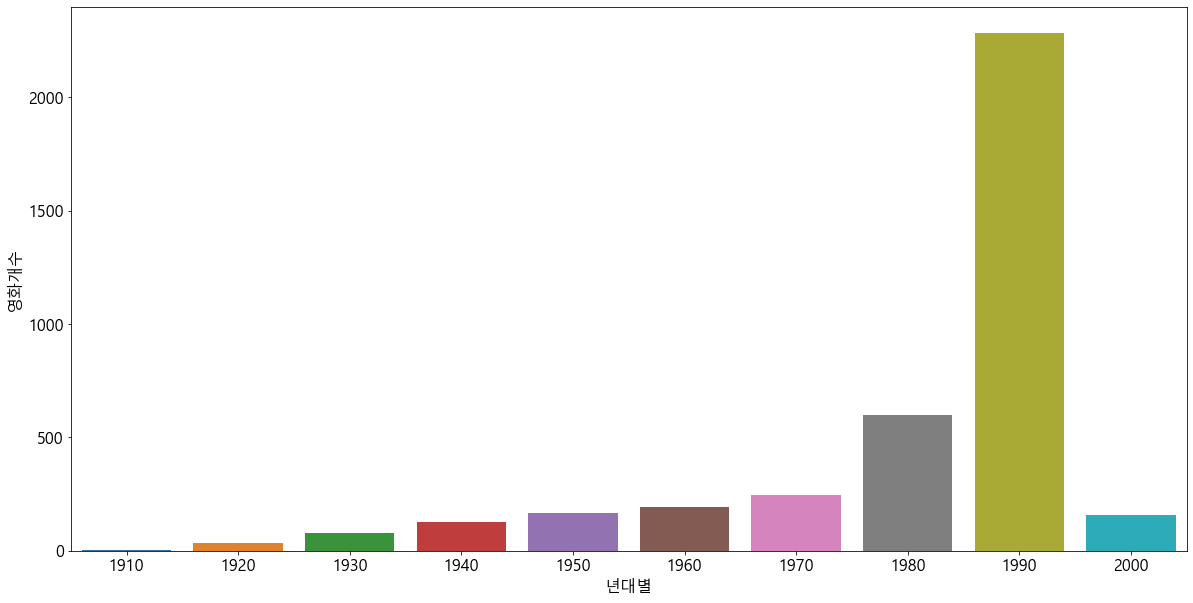

In [78]:
sns.barplot(data=m_df1, x='년대별', y='영화개수')
plt.show()

### 장르별 영화 수를 구하고 시각화 하세요.(한 영화에 장르가 여러개가 있다면 각 장르별로 하나씩 있는 걸로 간주한다.)

In [238]:
movie_data['genre2'] = movie_data['genre'].str.split('|')

In [239]:
md = {
    'title' : [],
    'genre' : [],
    'movie_id' : []
}

In [240]:
for t_idx, t in enumerate(movie_data['title']):
    for g_idx in movie_data['genre2'][t_idx]:
        md['title'].append(t)
        md['genre'].append(g_idx)
        md['movie_id'].append(movie_data['movie_id'][t_idx])
md2 = pd.DataFrame(md)
md2

,title,genre,movie_id
0,Toy Story,Animation,1
1,Toy Story,Children's,1
2,Toy Story,Comedy,1
3,Jumanji,Adventure,2
4,Jumanji,Children's,2
...,...,...,...
6403,Requiem for a Dream,Drama,3949
6404,Tigerland,Drama,3950
6405,Two Family House,Drama,3951
6406,"Contender, The",Drama,3952


In [241]:
md1 = md2[['title','genre']].groupby('genre').count()
md1.sort_values(by='title', ascending=False, inplace=True)
md1.reset_index(inplace=True)
md1

,genre,title
0,Drama,1603
1,Comedy,1200
2,Action,503
3,Thriller,492
4,Romance,471
5,Horror,343
6,Adventure,283
7,Sci-Fi,276
8,Children's,251
9,Crime,211


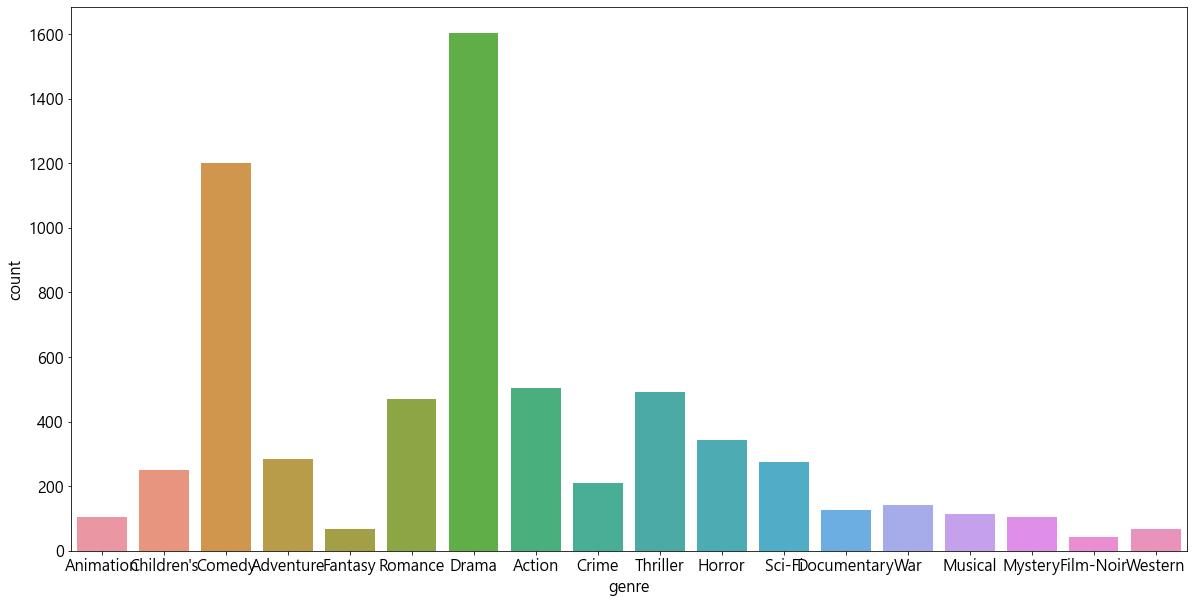

In [204]:
sns.countplot(data=md2, x='genre')
plt.show()

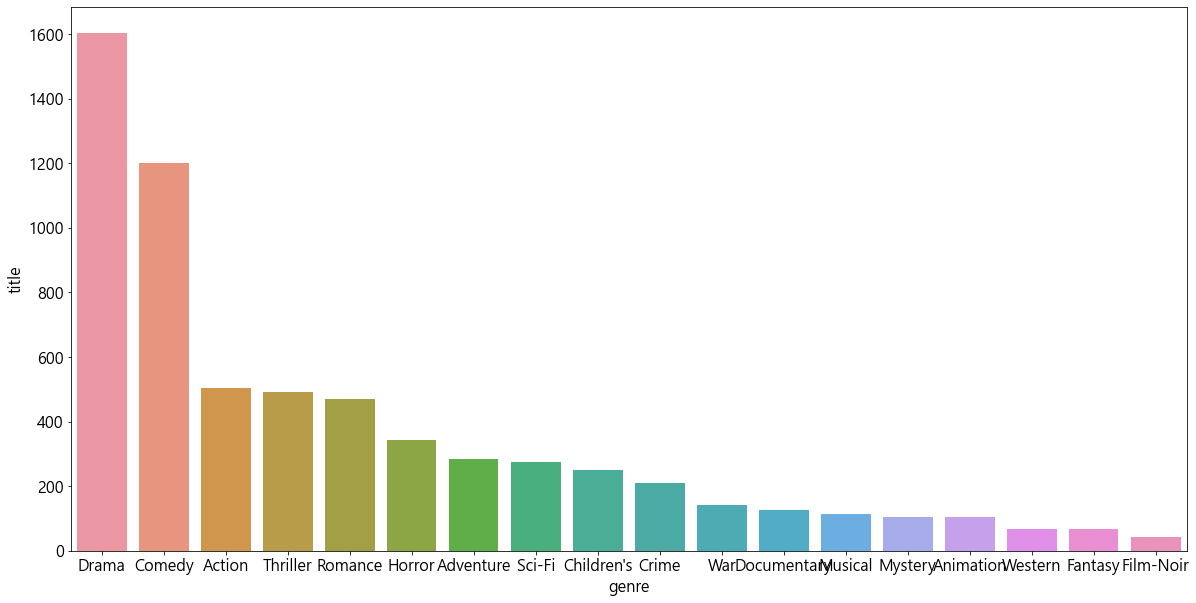

In [205]:
sns.barplot(data=md1, x='genre', y='title')
plt.show()

----

In [175]:
# 장르를 |를 기준으로 나눈다.
a1 = movie_data['genre'].str.split('|')
a1

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: genre, Length: 3883, dtype: object

In [176]:
# 전체 장르를 담을 리스트
genre_list = []
# 행의 수만큼 반복한다.
for a2 in a1.values :
    # 영화 장르를 리스트에 추가해준다.
    genre_list.extend(a2)
    
print(genre_list)

['Animation', "Children's", 'Comedy', 'Adventure', "Children's", 'Fantasy', 'Comedy', 'Romance', 'Comedy', 'Drama', 'Comedy', 'Action', 'Crime', 'Thriller', 'Comedy', 'Romance', 'Adventure', "Children's", 'Action', 'Action', 'Adventure', 'Thriller', 'Comedy', 'Drama', 'Romance', 'Comedy', 'Horror', 'Animation', "Children's", 'Drama', 'Action', 'Adventure', 'Romance', 'Drama', 'Thriller', 'Drama', 'Romance', 'Thriller', 'Comedy', 'Action', 'Action', 'Comedy', 'Drama', 'Crime', 'Drama', 'Thriller', 'Thriller', 'Drama', 'Sci-Fi', 'Drama', 'Romance', 'Drama', 'Drama', 'Romance', 'Adventure', 'Sci-Fi', 'Drama', 'Drama', 'Drama', 'Sci-Fi', 'Adventure', 'Romance', "Children's", 'Comedy', 'Drama', 'Drama', 'Romance', 'Drama', 'Documentary', 'Comedy', 'Comedy', 'Romance', 'Drama', 'Drama', 'War', 'Action', 'Crime', 'Drama', 'Drama', 'Action', 'Adventure', 'Comedy', 'Drama', 'Drama', 'Romance', 'Crime', 'Thriller', 'Animation', "Children's", 'Musical', 'Romance', 'Drama', 'Romance', 'Crime', 'Th

In [177]:
# Series로 생성한다.
s1 = pd.Series(genre_list)
s1

0        Animation
1       Children's
2           Comedy
3        Adventure
4       Children's
           ...    
6403         Drama
6404         Drama
6405         Drama
6406         Drama
6407      Thriller
Length: 6408, dtype: object

In [188]:
# 몇 개씩 있는지 가져온다.
a3 = s1.value_counts()
a3

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

In [189]:
# 출력한다.
d1 = pd.DataFrame(a3)
d1.reset_index(inplace=True)
d1.columns = ['장르', '영화수']
d1

,장르,영화수
0,Drama,1603
1,Comedy,1200
2,Action,503
3,Thriller,492
4,Romance,471
5,Horror,343
6,Adventure,283
7,Sci-Fi,276
8,Children's,251
9,Crime,211


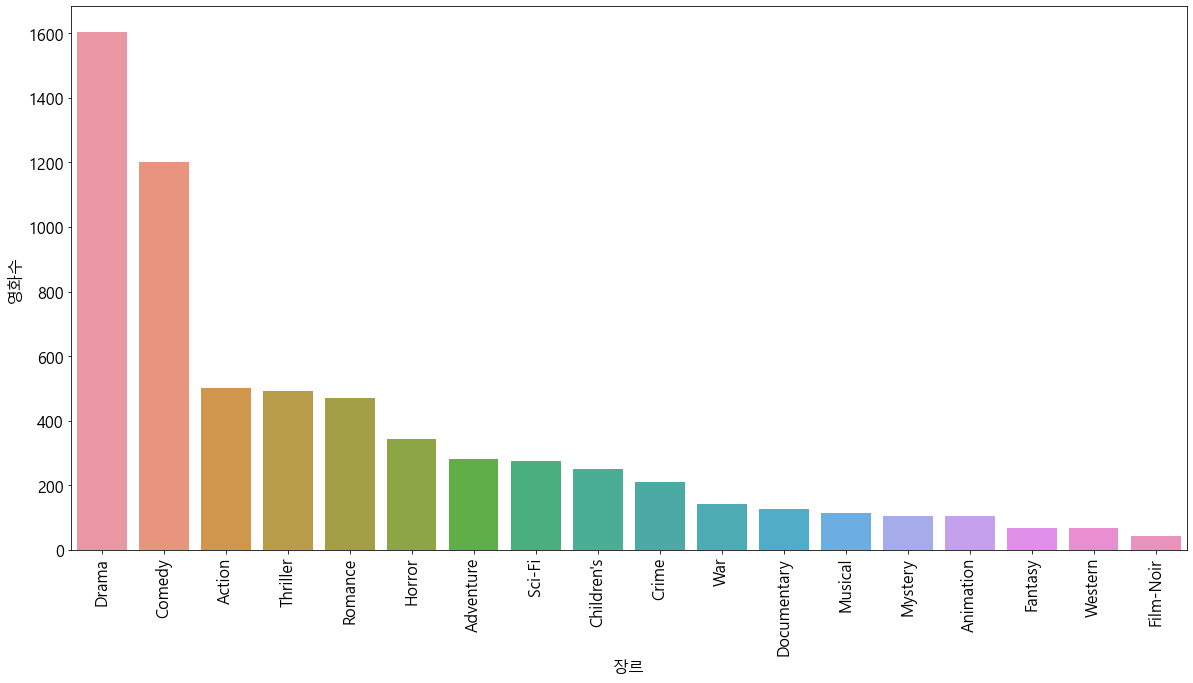

In [190]:
# 시각화 한다.
sns.barplot(data=d1, x='장르', y='영화수')
plt.xticks(rotation=90)
plt.show()

### 사용자 성별 수를 그래프로 시각화한다.

In [84]:
user_data['gender'].value_counts()

M    4331
F    1709
Name: gender, dtype: int64

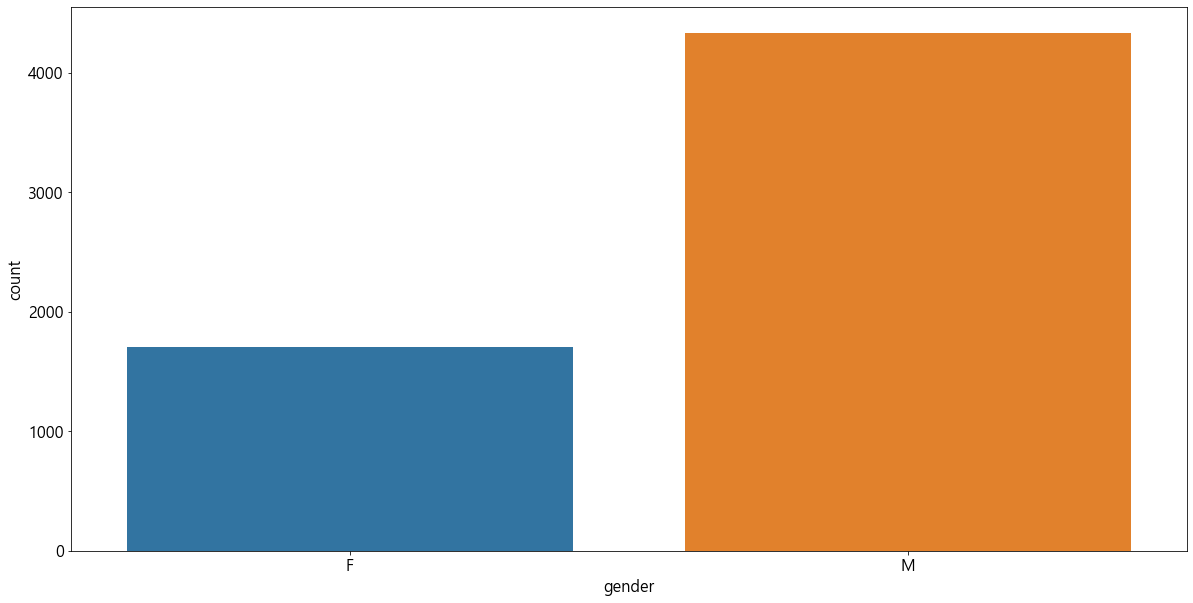

In [85]:
sns.countplot(data=user_data, x='gender')
plt.show()

### 연령대별(10, 20, 30대...) 사용자 수를 그래프로 시각화 한다.

In [89]:
user_data['age2'] = user_data['age'] // 10 * 10
user_data

,user_id,gender,age,occupation,zipcode,age2
0,1,F,1,10,48067,0
1,2,M,56,16,70072,50
2,3,M,25,15,55117,20
3,4,M,45,7,02460,40
4,5,M,25,20,55455,20
...,...,...,...,...,...,...
6035,6036,F,25,15,32603,20
6036,6037,F,45,1,76006,40
6037,6038,F,56,1,14706,50
6038,6039,F,45,0,01060,40


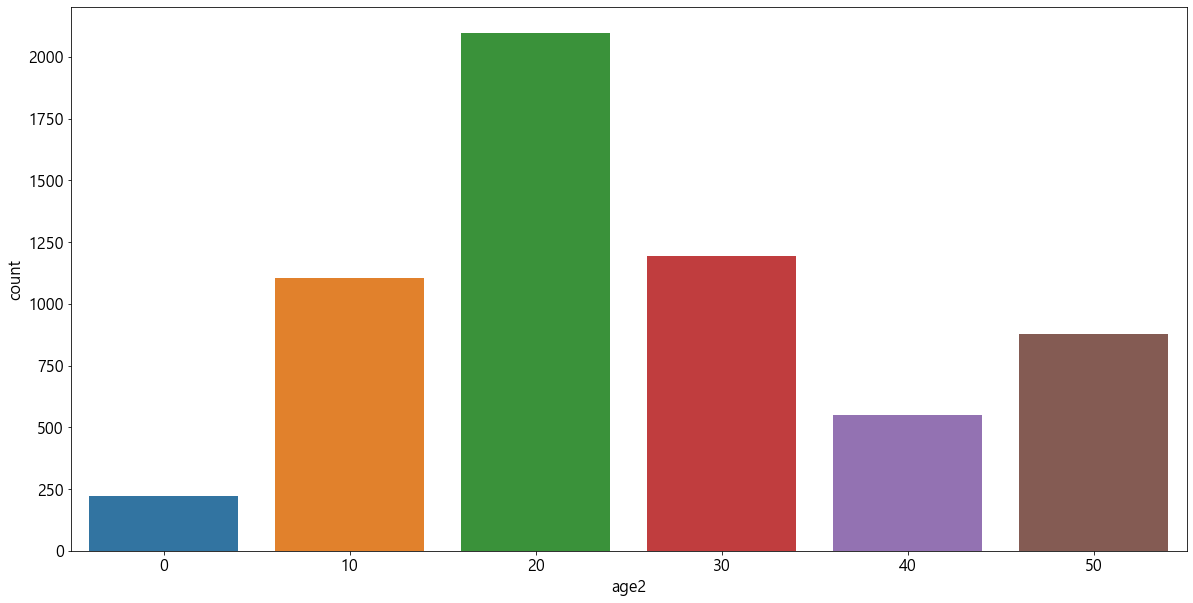

In [90]:
sns.countplot(data=user_data, x='age2')
plt.show()

### 평균 평점이 가장 높은 장르가 무엇인지 확인한다.


In [244]:
md1 = rating_data[['movie_id', 'rating']]
md1

,movie_id,rating
0,1193,5
1,661,3
2,914,3
3,3408,4
4,2355,5
...,...,...
1000204,1091,1
1000205,1094,5
1000206,562,5
1000207,1096,4


In [245]:
md3 = md1.groupby('movie_id').mean()
md3

,rating
movie_id,
1,4.146846
2,3.201141
3,3.016736
4,2.729412
5,3.006757
...,...
3948,3.635731
3949,4.115132
3950,3.666667


In [246]:
md3 = md2.merge(md3, on='movie_id', how='inner')
md3

,title,genre,movie_id,rating
0,Toy Story,Animation,1,4.146846
1,Toy Story,Children's,1,4.146846
2,Toy Story,Comedy,1,4.146846
3,Jumanji,Adventure,2,3.201141
4,Jumanji,Children's,2,3.201141
...,...,...,...,...
6187,Requiem for a Dream,Drama,3949,4.115132
6188,Tigerland,Drama,3950,3.666667
6189,Two Family House,Drama,3951,3.900000
6190,"Contender, The",Drama,3952,3.780928


In [260]:
md4 = md3[['genre', 'rating']].groupby('genre').agg(['count', 'sum'])
md4

rating             
             count          sum
genre                          
Action         495  1533.656030
Adventure      281   871.005502
Animation      105   352.628401
Children's     250   751.581326
Comedy        1163  3674.991663
Crime          201   680.411718
Documentary    110   405.667380
Drama         1493  5099.089394
Fantasy         68   210.722462
Film-Noir       44   167.483692
Horror         339   924.470887
Musical        113   382.844281
Mystery        104   357.815363
Romance        459  1532.609809
Sci-Fi         274   842.130803
Thriller       485  1564.580393
War            141   506.798274
Western         67   232.619054

In [261]:
md4 = md4['rating']

In [263]:
md4['mean'] = md4['sum']/md4['count']

In [265]:
md4.sort_values(by='mean',ascending=False,inplace=True)
md4

,count,sum,mean
genre,,,
Film-Noir,44,167.483692,3.806448
Documentary,110,405.667380,3.687885
War,141,506.798274,3.594314
Western,67,232.619054,3.471926
Mystery,104,357.815363,3.440532
Drama,1493,5099.089394,3.415331
Musical,113,382.844281,3.388002
Crime,201,680.411718,3.385133
Animation,105,352.628401,3.358366


### 연령대별(10, 20, 30대...) 평점의 평균을 구해 시각화 한다.


In [233]:
user_rating = rating_data.merge(user_data).copy()
user_rating

,user_id,movie_id,rating,time,gender,age,occupation,zipcode,age2
0,1,1193,5,978300760,F,1,10,48067,0
1,1,661,3,978302109,F,1,10,48067,0
2,1,914,3,978301968,F,1,10,48067,0
3,1,3408,4,978300275,F,1,10,48067,0
4,1,2355,5,978824291,F,1,10,48067,0
...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,20
1000205,6040,1094,5,956704887,M,25,6,11106,20
1000206,6040,562,5,956704746,M,25,6,11106,20
1000207,6040,1096,4,956715648,M,25,6,11106,20


In [99]:
a1 = user_rating[['age2', 'rating']].groupby('age2').mean()
a1.reset_index(inplace=True)
a1.columns = ['연령대', '평점평균']
a1

,age2,rating
0,0,5
1,0,3
2,0,3
3,0,4
4,0,5
...,...,...
1000204,20,1
1000205,20,5
1000206,20,5
1000207,20,4


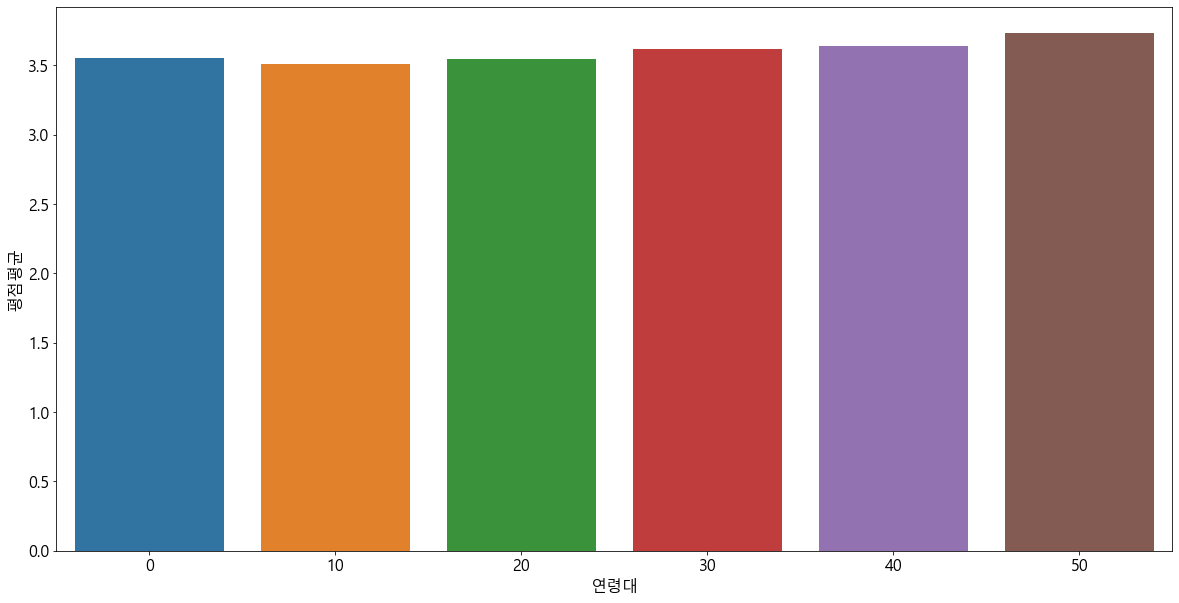

In [100]:
sns.barplot(data=a1, x='연령대', y='평점평균')
plt.show()

### 직업(occupation) 별 영화 평점의 평균을 구해 시각화 한다.

In [102]:
a1 = user_rating[['occupation', 'rating']].groupby('occupation').mean()
a1.reset_index(inplace=True)
a1.columns = ['직업', '평점평균']
a1

,직업,평점평균
0,0,3.537544
1,1,3.576642
2,2,3.573081
3,3,3.656516
4,4,3.536793
5,5,3.537529
6,6,3.661578
7,7,3.599772
8,8,3.466741
9,9,3.656589


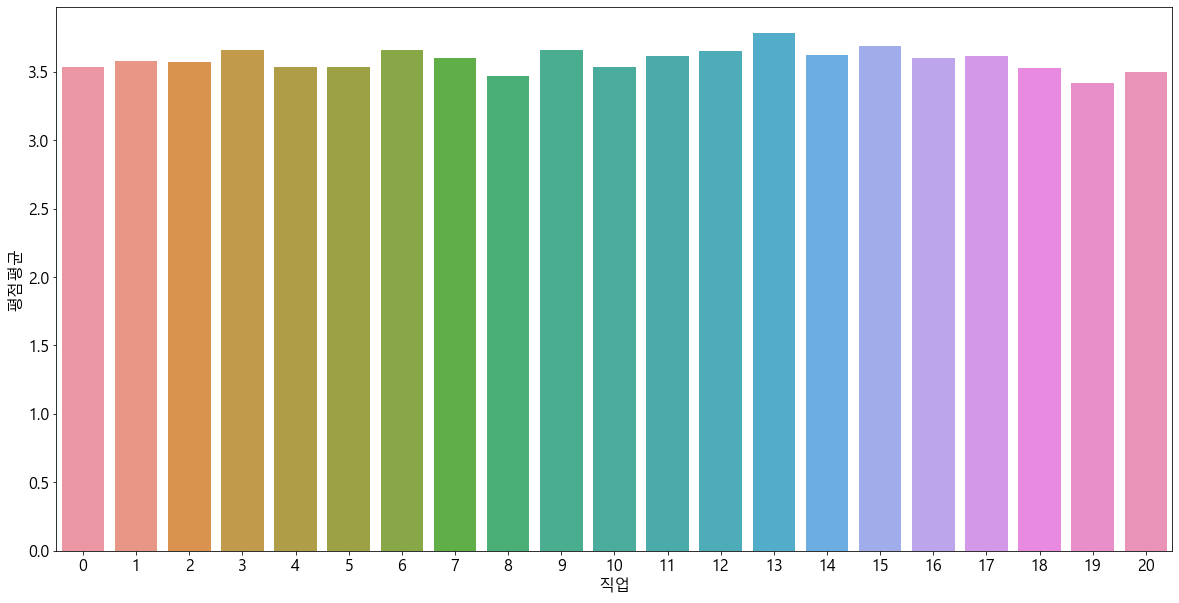

In [103]:
sns.barplot(data=a1, x='직업', y='평점평균')
plt.show()

### Surprise 라이브러리
- 아마존, 넷플릭스 등에서 사용하는 추천알고리즘을 라이브러리로 만든 것이다.
- 특정 사용자가 상품들에게 준 평점과 유사하게 평점을 준 사용자를 찾아 그 사용자가 높은 평점을 준 상품을 추천해주는 방식이다.

In [9]:
!pip install surprise

In [11]:
import surprise

In [14]:
# 테스트용 데이터 프레임을 생성한다.
rating_dict = {
    'item_id' : [1, 2, 3, 1, 2, 3, 2],
    'user_id' : ['a', 'a', 'a', 'b', 'b', 'b', 'c'],
    'rating' : [2, 4, 4, 2, 5, 4, 5]
}
df = pd.DataFrame(rating_dict)
df

,item_id,user_id,rating
0,1,a,2
1,2,a,4
2,3,a,4
3,1,b,2
4,2,b,5
5,3,b,4
6,2,c,5


In [15]:
# surprise는 사용자구분값, 상품구분값, 평점으로 구성된 데이터를 사용한다.
# 사용자구분값은 user_id, 상품 구분값은 item_id, 평점은 rating이라는 이름으로 되어 있어야하고,
# user_id, item_id, rating 순으로 되어 있어야 한다.

# surprise에서 사용하는 구조로 변환한다.
# 사용자id, 상품id, 평점 순으로 변경한다.
a1 = df[['user_id', 'item_id', 'rating']]
a1

,user_id,item_id,rating
0,a,1,2
1,a,2,4
2,a,3,4
3,b,1,2
4,b,2,5
5,b,3,4
6,c,2,5


In [16]:
# 데이터를 읽어드릴 reader를 생성한다.
# rating_scale : 평저의 최소와 최대를 구한다.
reader = surprise.Reader(rating_scale=(1, 5))
# 데이터를 불러온다.
data = surprise.Dataset.load_from_df(df=a1, reader=reader)
data

In [17]:
# 학습용 데이터를 생성한다.
# surprise가 인식할 수 있는 학습 데이터셋 구성
train_data = data.build_full_trainset()
train_data

In [18]:
# 학습모델을 생성하고 학습한다.
model = surprise.SVD()
model.fit(train_data)

In [19]:
# 예측한다.
# 본 데이터에서는 a 사용자가 1, 2, 3 상품에 대한 평점이 있고
# b 사용자가 1, 2, 3 상품에 대한 평점이 있다.
# 그리고 c 사용자가 2 상품에 대한 평점만 있다.
# 이에 예측을 하게 되면 c 사용자가 1, 3 상품에 한 평점을 예측하게 된다.
# 이때, c 사용자가 2 상품에 준 평점을 기반으로 다른 사용자와의 유사성을 파악하여 평점을 에측하게 된다.

# test 데이터셋을 구성한다.
# 평점을 주지 않은 상품 정보가 담기게 된다.
test_data = train_data.build_anti_testset()
# 예측한다.
pred = model.test(test_data)
pred

[Prediction(uid='c', iid=1, r_ui=3.7142857142857144, est=3.4350916163691805, details={'was_impossible': False}),
 Prediction(uid='c', iid=3, r_ui=3.7142857142857144, est=3.995535387777284, details={'was_impossible': False})]

In [22]:
for uid, iid, _, est, _ in pred :
    print(f'사용자 : {uid}')
    print(f'상품번호 : {iid}')
    print(f'예측평점 : {est}')
    print('------------------------------')

사용자 : c
상품번호 : 1
예측평점 : 3.4350916163691805
------------------------------
사용자 : c
상품번호 : 3
예측평점 : 3.995535387777284
------------------------------


### MovieLens 데이터 사용

In [27]:
# 평점 최소와 최대를 파악한다.
rating_data['rating'].agg(['min', 'max'])

min    1
max    5
Name: rating, dtype: int64

In [30]:
# reader 생성
reader = surprise.Reader(rating_scale=(1, 5))
reader

In [31]:
# 데이터를 생성한다.
a1 = rating_data[['user_id', 'movie_id', 'rating']]
data = surprise.Dataset.load_from_df(a1, reader)
train_data =data.build_full_trainset()
train_data

In [32]:
# 학습한다.
model = surprise.SVD()
model.fit(train_data)

### 예측할 사용자 선정

In [33]:
# user_id가 4인 사용자에 대해 예측을 한다.
# user_id가 4인 유저의 평점 데이터를 가져온다.
target_user_id = 4
target_user_data = rating_data.query('user_id == @target_user_id')
target_user_data

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282
238,4,260,5,978294199
239,4,2028,5,978294230
240,4,480,4,978294008
241,4,1196,2,978294199
242,4,1198,5,978294199


In [35]:
# 4번 사용자가 보지 않은 영화 인덱스를 가져온다.
movie_id_list = []

# 4번 사용자가 본 영화 id
a1 = target_user_data['movie_id'].values

# 모든 영화의 id를 가져온다.
a2 = movie_data['movie_id'].values
# 모든 영화의 수 만큼 반복한다.
for a3 in a2 :
    # 현재의 영화가 사용자가 보지 않은 영화라면
    if a3 not in a1 :
        # 리스트에 담는다.
        movie_id_list.append(a3)
        
print(movie_id_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 2

In [36]:
# 예측 데이터 셋을 구성한다.
# 사용자 번호, 상품번호, 0 형태롤 구성해준다.
test_data = []

for movie_id in movie_id_list :
    test_data.append((target_user_id, movie_id, 0))
test_data

[(4, 1, 0),
 (4, 2, 0),
 (4, 3, 0),
 (4, 4, 0),
 (4, 5, 0),
 (4, 6, 0),
 (4, 7, 0),
 (4, 8, 0),
 (4, 9, 0),
 (4, 10, 0),
 (4, 11, 0),
 (4, 12, 0),
 (4, 13, 0),
 (4, 14, 0),
 (4, 15, 0),
 (4, 16, 0),
 (4, 17, 0),
 (4, 18, 0),
 (4, 19, 0),
 (4, 20, 0),
 (4, 21, 0),
 (4, 22, 0),
 (4, 23, 0),
 (4, 24, 0),
 (4, 25, 0),
 (4, 26, 0),
 (4, 27, 0),
 (4, 28, 0),
 (4, 29, 0),
 (4, 30, 0),
 (4, 31, 0),
 (4, 32, 0),
 (4, 33, 0),
 (4, 34, 0),
 (4, 35, 0),
 (4, 36, 0),
 (4, 37, 0),
 (4, 38, 0),
 (4, 39, 0),
 (4, 40, 0),
 (4, 41, 0),
 (4, 42, 0),
 (4, 43, 0),
 (4, 44, 0),
 (4, 45, 0),
 (4, 46, 0),
 (4, 47, 0),
 (4, 48, 0),
 (4, 49, 0),
 (4, 50, 0),
 (4, 51, 0),
 (4, 52, 0),
 (4, 53, 0),
 (4, 54, 0),
 (4, 55, 0),
 (4, 56, 0),
 (4, 57, 0),
 (4, 58, 0),
 (4, 59, 0),
 (4, 60, 0),
 (4, 61, 0),
 (4, 62, 0),
 (4, 63, 0),
 (4, 64, 0),
 (4, 65, 0),
 (4, 66, 0),
 (4, 67, 0),
 (4, 68, 0),
 (4, 69, 0),
 (4, 70, 0),
 (4, 71, 0),
 (4, 72, 0),
 (4, 73, 0),
 (4, 74, 0),
 (4, 75, 0),
 (4, 76, 0),
 (4, 77, 0),
 (4, 78,

In [38]:
# 예측한다.
pred = model.test(test_data)
pred

[Prediction(uid=4, iid=1, r_ui=0, est=4.310952418170578, details={'was_impossible': False}),
 Prediction(uid=4, iid=2, r_ui=0, est=3.2414248196425577, details={'was_impossible': False}),
 Prediction(uid=4, iid=3, r_ui=0, est=2.9904180988138593, details={'was_impossible': False}),
 Prediction(uid=4, iid=4, r_ui=0, est=3.459305937352659, details={'was_impossible': False}),
 Prediction(uid=4, iid=5, r_ui=0, est=3.4380994133409097, details={'was_impossible': False}),
 Prediction(uid=4, iid=6, r_ui=0, est=4.253362814320757, details={'was_impossible': False}),
 Prediction(uid=4, iid=7, r_ui=0, est=3.894248673454182, details={'was_impossible': False}),
 Prediction(uid=4, iid=8, r_ui=0, est=3.4559177739987783, details={'was_impossible': False}),
 Prediction(uid=4, iid=9, r_ui=0, est=2.866519179135809, details={'was_impossible': False}),
 Prediction(uid=4, iid=10, r_ui=0, est=3.3214059752320484, details={'was_impossible': False}),
 Prediction(uid=4, iid=11, r_ui=0, est=3.66248073881358, details

In [43]:
# 영화번호와 평점을 담을 딕셔너리
pred_dict = {
    'movie_id' : [],
    'rating' : []
}

# 예측한 영화의 수 만큼 반복한다.
for p1 in pred :
    # 영화 번호와 예측한 평점을 담아준다.
    pred_dict['movie_id'].append(p1.iid)
    pred_dict['rating'].append(p1.est)
pred_df = pd.DataFrame(pred_dict)
pred_df

,movie_id,rating
0,1,4.310952
1,2,3.241425
2,3,2.990418
3,4,3.459306
4,5,3.438099
...,...,...
3857,3948,3.585772
3858,3949,3.900538
3859,3950,3.999190
3860,3951,4.297008


In [44]:
# 예측된 평점순으로 내림차순 정렬한다.
pred_df.sort_values(by='rating', ascending=False, inplace=True)
pred_df

,movie_id,rating
845,858,4.933578
898,912,4.912394
521,527,4.897786
1232,1262,4.829311
1179,1204,4.827656
...,...,...
1293,1323,1.830813
798,810,1.817901
2300,2383,1.796003
3709,3799,1.787084


In [46]:
# movie_data랑 join한다.
join_df = pd.merge(left=pred_df, right=movie_data)
join_df

,movie_id,rating,title,genre
0,858,4.933578,"Godfather, The (1972)",Action|Crime|Drama
1,912,4.912394,Casablanca (1942),Drama|Romance|War
2,527,4.897786,Schindler's List (1993),Drama|War
3,1262,4.829311,"Great Escape, The (1963)",Adventure|War
4,1204,4.827656,Lawrence of Arabia (1962),Adventure|War
...,...,...,...,...
3857,1323,1.830813,Amityville 3-D (1983),Horror
3858,810,1.817901,Kazaam (1996),Children's|Comedy|Fantasy
3859,2383,1.796003,Police Academy 6: City Under Siege (1989),Comedy
3860,3799,1.787084,Pokémon the Movie 2000 (2000),Animation|Children's


In [47]:
# 상위 10개만 가져온다.
top10_df = join_df.head(10)
top10_df

,movie_id,rating,title,genre
0,858,4.933578,"Godfather, The (1972)",Action|Crime|Drama
1,912,4.912394,Casablanca (1942),Drama|Romance|War
2,527,4.897786,Schindler's List (1993),Drama|War
3,1262,4.829311,"Great Escape, The (1963)",Adventure|War
4,1204,4.827656,Lawrence of Arabia (1962),Adventure|War
5,2019,4.802146,Seven Samurai (The Magnificent Seven) (Shichin...,Action|Drama
6,1148,4.774961,"Wrong Trousers, The (1993)",Animation|Comedy
7,3022,4.748386,"General, The (1927)",Comedy
8,2905,4.743205,Sanjuro (1962),Action|Adventure
9,922,4.742635,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Film-Noir


In [48]:
top10_df['title']

0                                Godfather, The (1972)
1                                    Casablanca (1942)
2                              Schindler's List (1993)
3                             Great Escape, The (1963)
4                            Lawrence of Arabia (1962)
5    Seven Samurai (The Magnificent Seven) (Shichin...
6                           Wrong Trousers, The (1993)
7                                  General, The (1927)
8                                       Sanjuro (1962)
9        Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
Name: title, dtype: object